# Проект: Исследование рынка видеоигр. #

### Описание проекта ###
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br><br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Датафрейм имеет следующую структуру: ###
Name — название игры<br><br>
Platform — платформа<br><br>
Year_of_Release — год выпуска<br><br>
Genre — жанр игры<br><br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br><br>
EU_sales — продажи в Европе (миллионы проданных копий)<br><br>
JP_sales — продажи в Японии (миллионы проданных копий)<br><br>
Other_sales — продажи в других странах (миллионы проданных копий)<br><br>
Critic_Score — оценка критиков (максимум 100)<br><br>
User_Score — оценка пользователей (максимум 10)<br><br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы над проектом: ###
1.Изучение данных из файла.<br><br>2.Предобработка данных.<br><br>3.Проведение исследовательского анализа и подготовка актуальных данных.<br><br>4.Составление портретов пользователей для крупных регионов продаж.<br><br>5.Проверка гипотез предложенных гипотез.<br><br>6.Итоговый вывод

# Шаг 1. Откройте файл с данными и изучите общую информацию #

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**<br><br>
При первом визуальном ознакомлении с данными мы видим, что необходимо привести наименование всех столбцов к нижнему регистру, проанализировать пропуски(Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating), по возможности заполнить их данными, а так же заменить тип данных в некоторых стобцах.('Year_of_Release' и 'User_Score').

# Шаг 2. Подготовим данные #

In [6]:
# названия столбцов не соответствуют snake case, приведем все к нижнему регистру.
df.columns = df.columns.str.lower() 

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# в столбце name имеются пропуски, заполним их.
df['name'] = df['name'].fillna('no name')

In [9]:
df['name'].isna().sum()

0

In [10]:
# в столбце genre имеются пропуски, заполним их.
df['genre'] = df['genre'].fillna('no genre')

In [11]:
df['genre'].isna().sum()

0

In [12]:
# cтроки с пропущенным годом релиза удалим, их количество не на столько высоко, от общего объема данных.
df.dropna(subset=['year_of_release'], inplace=True)

In [13]:
# год выпуска приведем к целочисленному типу данных.
df['year_of_release'] = df['year_of_release'].astype('int')

In [14]:
# аббревиатура "tbd" означает "to be defined" - предстоит определить, заменим на их на NaN.
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [15]:
# оценку пользователей переведем к типу данных c плавающей точкой.
df['user_score'] = df['user_score'].astype('float')

In [16]:
# пропуски в рейтинге ESRB заменим на without rating
df['rating'] = df['rating'].fillna('without rating')

In [17]:
# поиск дубликатов
df.duplicated().sum()

0

In [18]:
# cоздадим столбец с суммарными продажами во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:**<br><br>В результате предобработки данных, наименование столбцов было приведено к нижнему регистру, пропущенные значения в стобцах 'name' и 'genre' заменены на соотвественные значения 'no name' и 'no genre', удалены строки с пропусками в столбце 'year_of_release' и значения столбца приведены к типу данных int, значения user_score, равные 'tbd' изменено на пропуск (nan)и значения столбца приведены к типу данных float, пропуски значений столбца 'rating' заменены на значение 'without rating', дубликаты не обнаружены, подсчитаны суммарные продажи во всех регионах в столбце 'total_sales'. 

Пропуски в столбце 'year_of_release' могли возникнуть в случе, если агрегатор игр не получил всю необходимую информацию от производителя. Пропуски в столбцах 'critic_score' и 'user_score' оставляем без изменений, во избежание искажения результатов анализа. Вероятно, пропуски связны с тем, что не каждая игра удостаивалась внимания критиков или доходила до широких международных рынков, а также с региональными особенностями. Пропуски в столбце 'rating' возможно связаны с тем что, агенство по рейтингу игр не оценила данные продукты игровой индустрии.


# Шаг 3. Проведите исследовательский анализ данных #

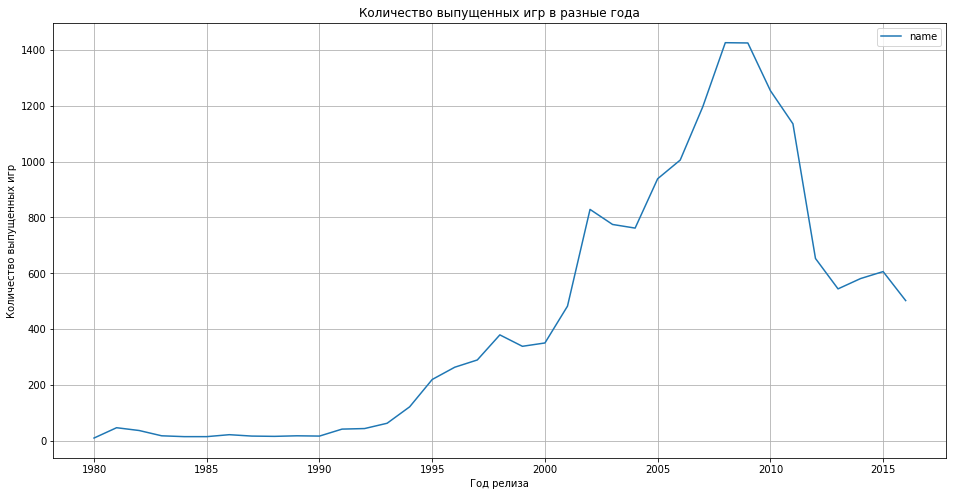

In [20]:
# посмотрим, какое количество релизов и продаж было в разные годы.
games_year = df.groupby('year_of_release')['name'].count()
games_year.plot(title='Количество выпущенных игр в разные года', xlabel='Год релиза', ylabel='Количество выпущенных игр', grid=True,figsize=(16,8)).legend();

**Вывод:**<br><br>
Образование игр пришлось на 80-ые. Количество игр на компьютеры и игровые приставки начало расти резкими темпами с 94 -95х годов до 2008 - 2009 года. Спад 2009 года объясняется тем что, начали массово создавать мобильные игры и приложения.

In [21]:
games_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

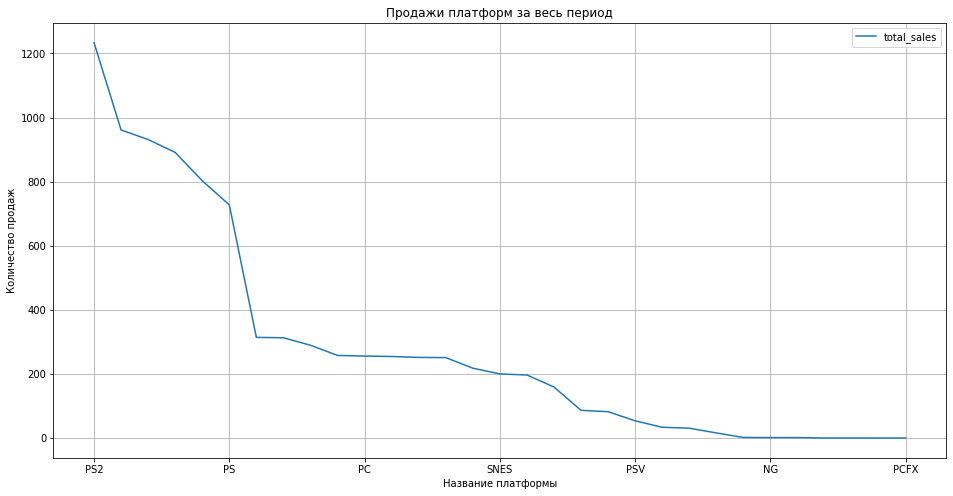

In [22]:
# посмотрим, как менялось количество выпущенных игр год от года на различных типах платформ.
platform_year = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_year.plot(title='Продажи платформ за весь период', xlabel='Название платформы', ylabel='Количество продаж', grid=True,figsize=(16,8)).legend();

In [23]:
platform_year

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Вывод:**<br><br>Cамыми популярными игровыми платформами за весь период являются: PS2, X360, PS3, Wii, DS, PS

In [61]:
df_actual = df.query('year_of_release >= 2014')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,without rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,without rating,7.98


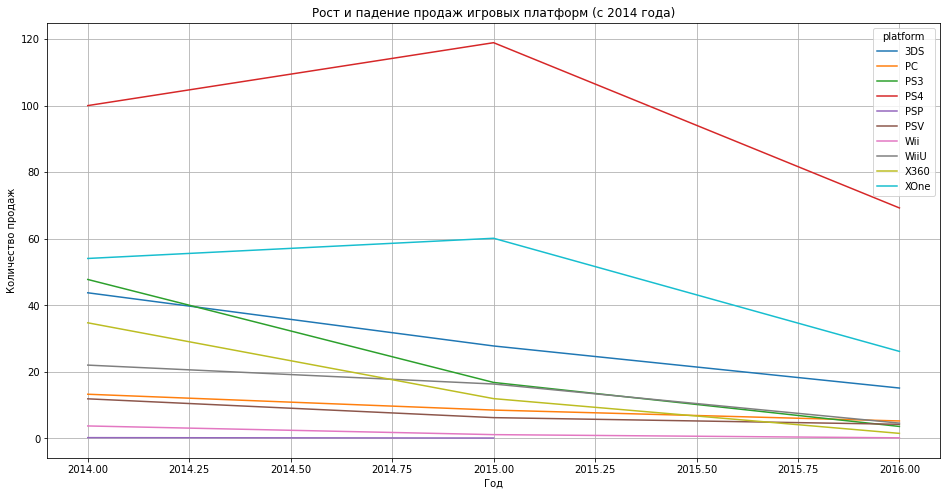

In [62]:
df_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').T.plot(title='Рост и падение продаж игровых платформ (с 2014 года)', xlabel='Год', ylabel='Количество продаж', grid=True,figsize=(16,8));

**Вывод:**<br><br>К категории потенциально прибыльных относятся такие платформы как PS4, XOne, 3DS, WiiU и PC. В общем и целом на графике можно наблюдать отрциательную тендецию у всех платформ. Падение спроса других моделей объясняется тем, что выходят более новые версии.

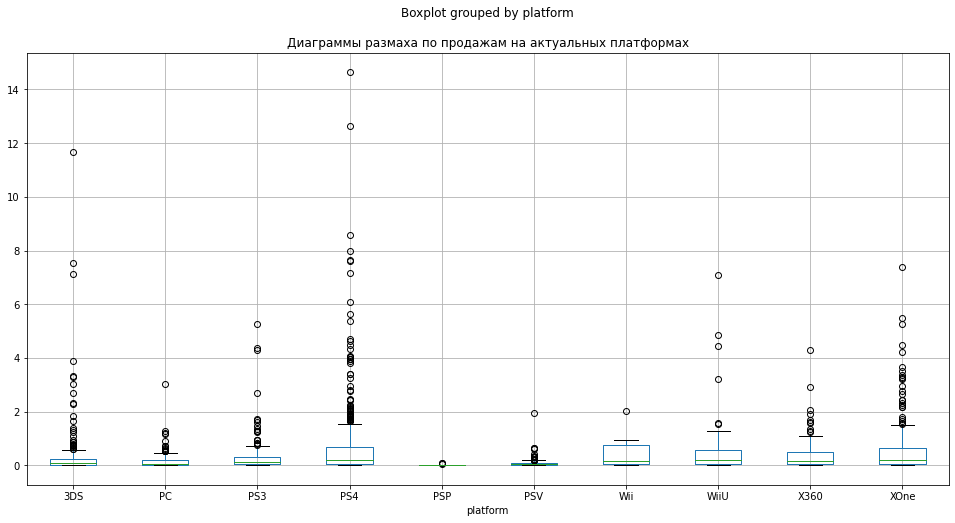

In [67]:
df_actual.boxplot(by='platform', column='total_sales', figsize=(16,8));
plt.title('Диаграммы размаха по продажам на актуальных платформах');

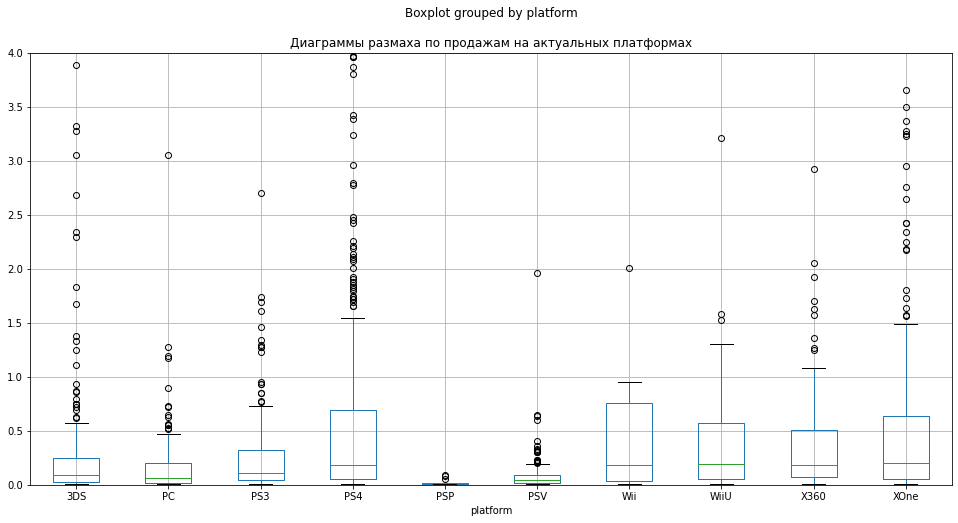

In [69]:
df_actual.boxplot(by='platform', column='total_sales', figsize=(16,8)).set(ylim=(0,4));
plt.title('Диаграммы размаха по продажам на актуальных платформах');

**Вывод:**<br><br>Лидером продаж является PS4, но и размах продаж по годам у нее самый большой. Из топ потенциальных прибыльных платформ, лидером продаж является PS4, но и размах продаж по годам у нее самый большой. Аутсайдером является PC, но и самой стабильной платформой, размах самый маленький. Выбросы обусловлены выходом популярных игровых проектов на данные платформы.

In [27]:
df_ps4 = df.query('platform == "PS4"')

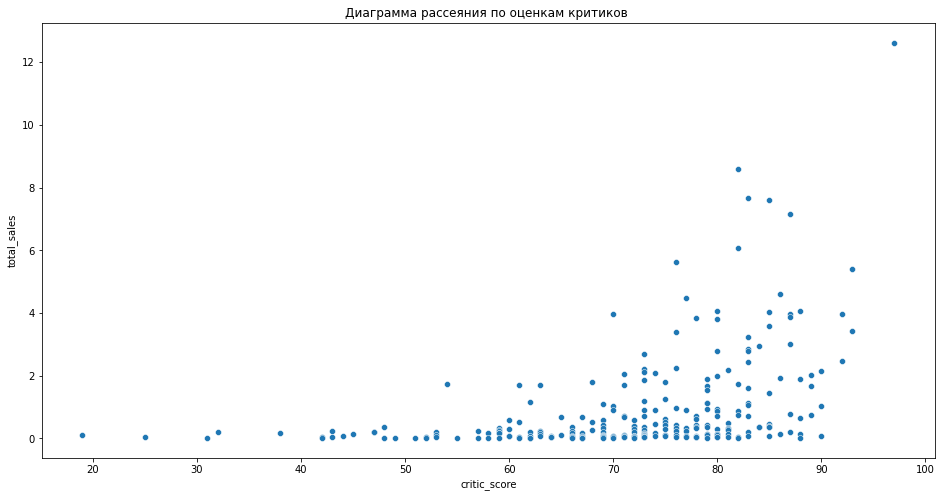

In [72]:
# построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(16,8))
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4).set(title='Диаграмма рассеяния по оценкам критиков ');

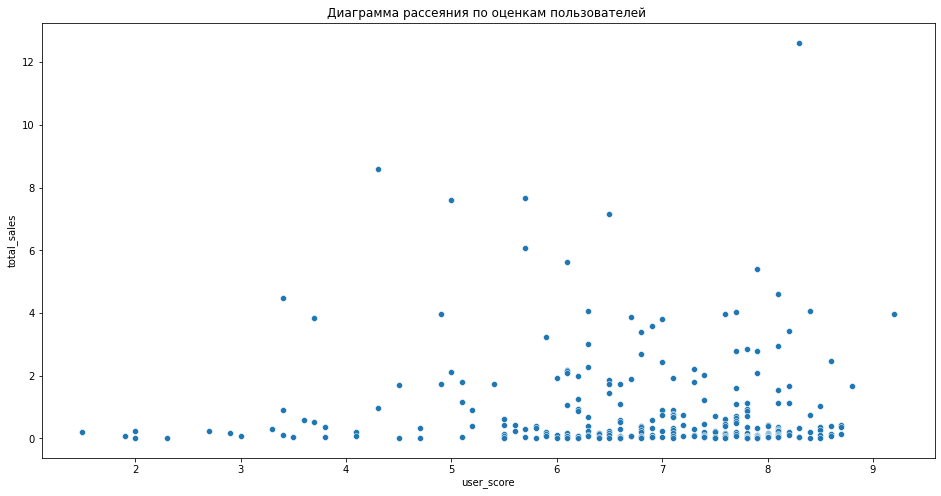

In [74]:
# построим диаграмму рассеяния по оценкам пользователей
plt.figure(figsize=(16,8))
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4).set(title='Диаграмма рассеяния по оценкам пользователей ');

In [30]:
# корреляция между оценкой критиков и продажами
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.40656790206178095

In [31]:
# корреляция между оценкой пользователей и продажами
df_ps4['user_score'].corr(df_ps4['total_sales'])

-0.031957110204556376


PS3:
Коэффициент корреляции user_score и total_sales: 0.08581058090172905
Коэффициент корреляции critic_score и total_sales: 0.3936035470871838

XOne:
Коэффициент корреляции user_score и total_sales: -0.1069648304783788
Коэффициент корреляции critic_score и total_sales: 0.41042203561296375

3DS:
Коэффициент корреляции user_score и total_sales: 0.21350415036249507
Коэффициент корреляции critic_score и total_sales: 0.33890386446332155

X360:
Коэффициент корреляции user_score и total_sales: 0.04598092101380614
Коэффициент корреляции critic_score и total_sales: 0.33628027358399615

WiiU:
Коэффициент корреляции user_score и total_sales: 0.38762774753677104
Коэффициент корреляции critic_score и total_sales: 0.350882422488643

PC:
Коэффициент корреляции user_score и total_sales: -0.012671962149418407
Коэффициент корреляции critic_score и total_sales: 0.33666765996406944


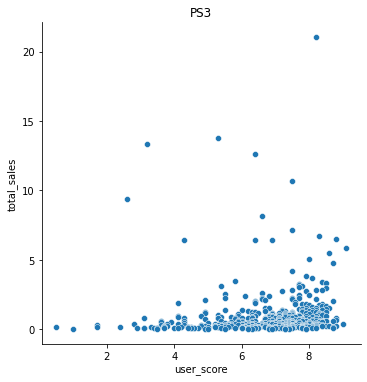

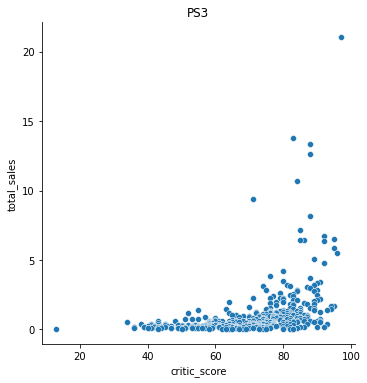

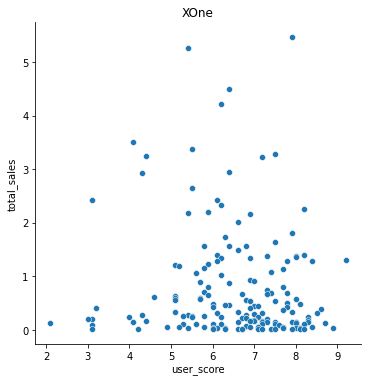

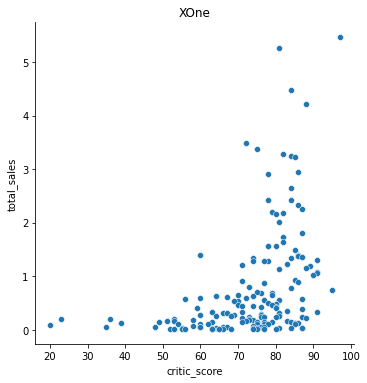

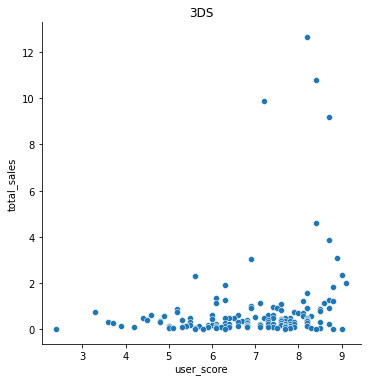

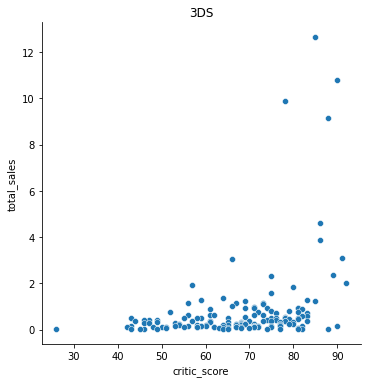

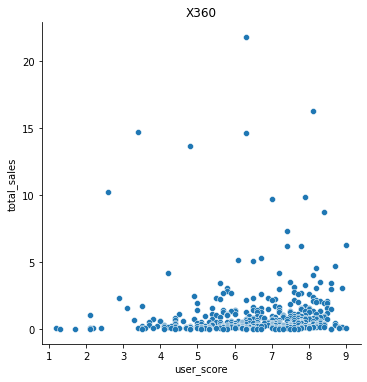

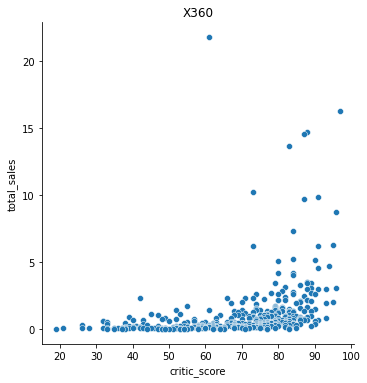

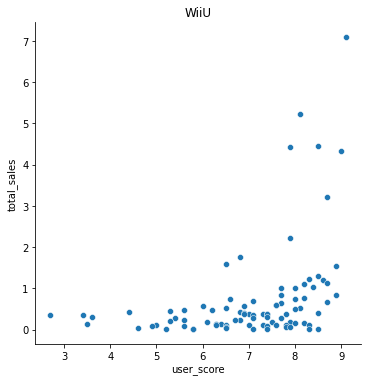

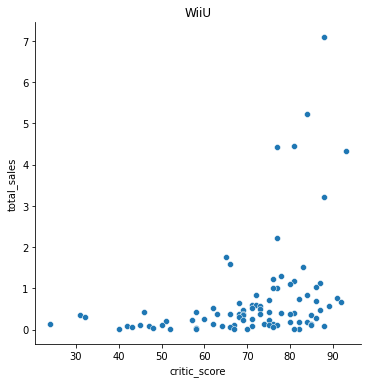

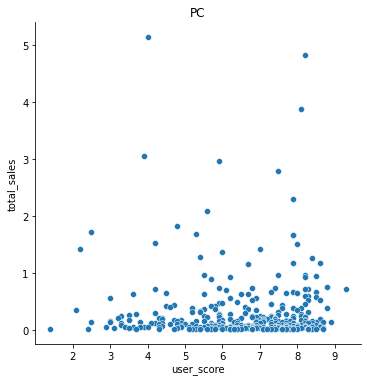

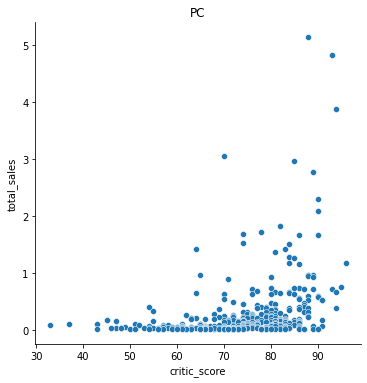

In [32]:
for platform in ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = df_actual.query('platform == @platform and user_score >= 0 and critic_score >= 0')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column]).corr(temp['total_sales']), 2))
        sns.relplot(x=column, y='total_sales', data=temp)
        _ = plt.title(platform)

**Вывод:**<br><br>Наблюдается зависимость количества продаж от оценки критиков или пользователей. Продажи имеют более высокий показатель, а так же выбросы, если оценки критиков высокие.

In [33]:
# выведем в виде сводной таблицы жанры и их продажи
genre_total_pivot = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False)
genre_total_pivot = genre_total_pivot.reset_index().rename_axis(None, axis=1)
genre_total_pivot

,genre,total_sales
0,Shooter,1.170098
1,Platform,0.782484
2,Sports,0.571113
3,Role-Playing,0.555070
4,Racing,0.517637
5,Action,0.450227
6,Fighting,0.410000
7,Misc,0.407222
8,Simulation,0.330645
9,Strategy,0.210824


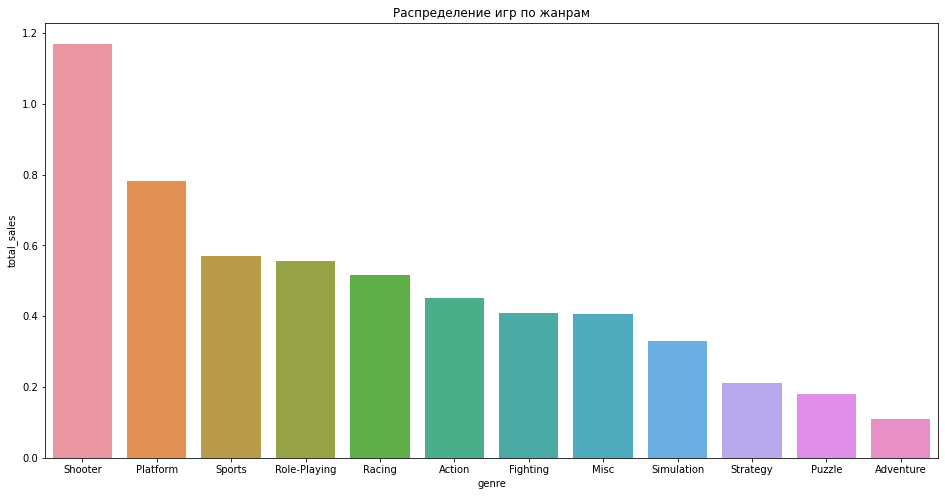

In [82]:
plt.figure(figsize=(16,8))
sns.barplot(data=genre_total_pivot, x='genre', y='total_sales').set(title='Распределение игр по жанрам');

**Вывод:**<br><br>Абсолютными лидерами по продажам являются игры жанра Shooter. Игры жанра Strategy, Puzzle и Adventure не имеют популярности среди потребителя.

# Шаг 4. Составьте портрет пользователя каждого региона #

In [35]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = df_actual.pivot_table(index='platform', values=column, aggfunc='sum').round()
    region.index.names = ['Платформа']
    display(region.nlargest(5, column))

,na_sales
Платформа,
X360,334.0
PS3,229.0
Wii,121.0
PS4,109.0
XOne,93.0


,eu_sales
Платформа,
PS3,214.0
X360,163.0
PS4,141.0
PC,69.0
Wii,66.0


,jp_sales
Платформа,
3DS,101.0
PS3,59.0
PSP,42.0
DS,28.0
PSV,22.0


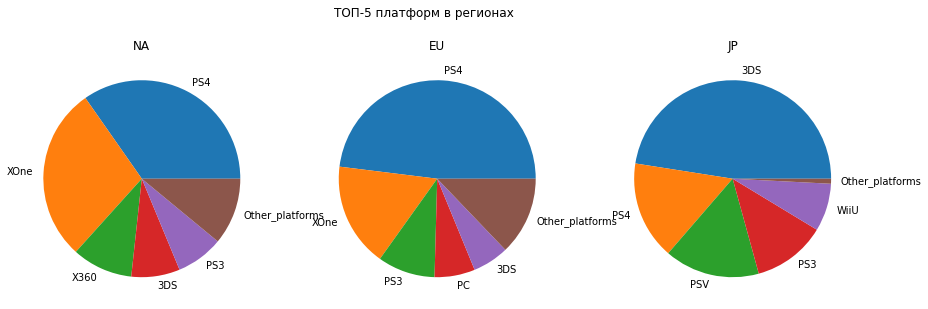

In [81]:
countries = df.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
    df_i = (df_actual.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
    df_i = df_i.append({'platform': 'Other_platforms', countries[i]: df_actual[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
    axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

In [37]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = df_actual.pivot_table(index='genre', values=column, aggfunc='sum').round()
    region.index.names = ['Жанр']
    display(region.nlargest(5, column))

,na_sales
Жанр,
Action,291.0
Shooter,237.0
Sports,157.0
Misc,124.0
Role-Playing,112.0


,eu_sales
Жанр,
Action,234.0
Shooter,171.0
Sports,117.0
Role-Playing,75.0
Misc,66.0


,jp_sales
Жанр,
Role-Playing,104.0
Action,72.0
Misc,24.0
Adventure,16.0
Platform,16.0


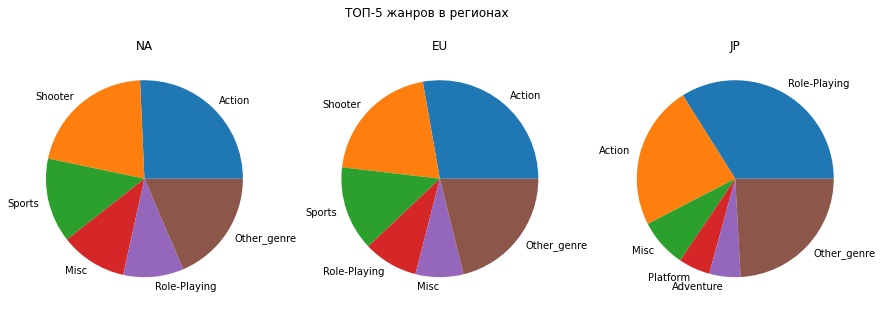

In [38]:
countries = df.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
    df_i = (df_actual.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
    df_i = df_i.append({'genre': 'Other_genre', countries[i]: df_actual[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
    axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

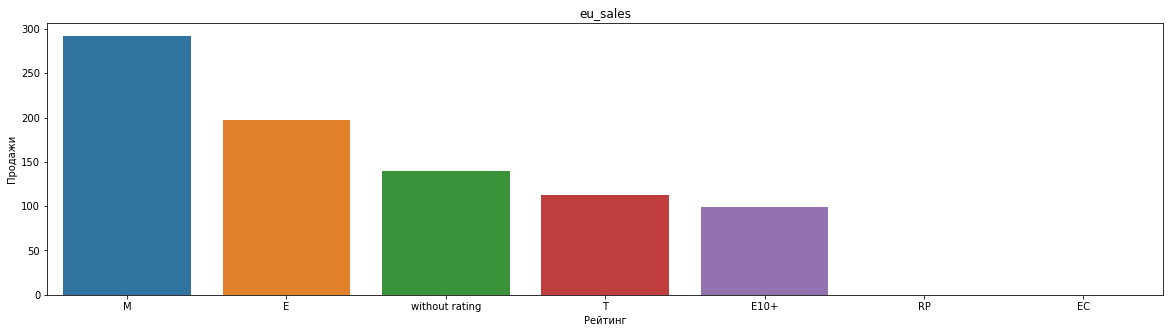

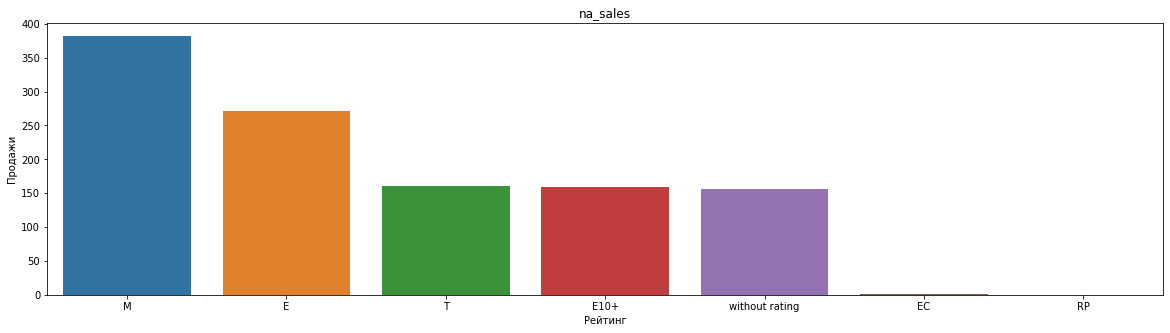

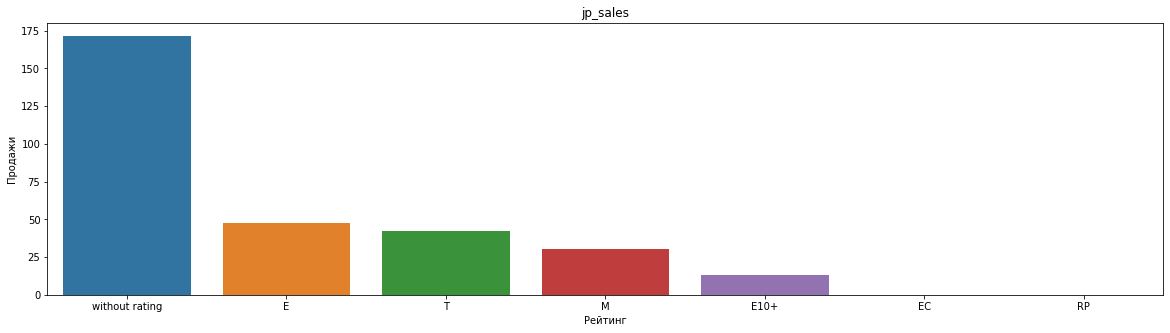

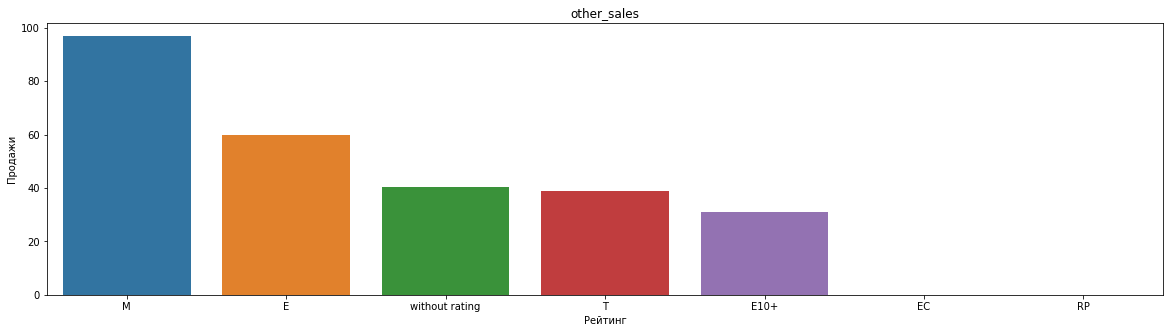

In [39]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
    plt.figure(figsize = (20,5))
    mvp = df_actual.pivot_table(index = 'rating',
                         values = region,
                         aggfunc = 'sum').sort_values(by = region,
                                                      ascending = False).reset_index()    
    sns.barplot(data = mvp, x = 'rating', y = region)
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')
    plt.title(region)
    plt.show()

***Вывод:***<br><br>1.Самые популярные платформы в Северной Америке и Европе являются XOne и PlayStation 4. В Японии преобладает лидерство 3DS.<br><br>
2.Самые популярные жанры игр в Северной Америке и Европе являются Action и Shooter. В Японии 
Предпочитают игры жанра Role-Playing и Action.<br><br>
3.В Северной Америке и Европе топ рейтингов игр – 'От 17 и выше' и 'для всех'. В Японии точно сказать невозможно, ибо доминирующее количество игр не имеют рейтинга. Будем считать, что преобладает категория ‘для всех’.


# Шаг 5. Проверьте гипотезы #

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**<br><br>
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br><br>
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [77]:
xone = df_actual.query('platform == "XOne" and user_score.notna()')['user_score']
pc = df_actual.query('platform == "PC" and user_score.notna()')['user_score']

In [78]:
alpha = 0.05
results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


***Вывод:***<br><br> Значение p-value равно чуть больше 10%. Нулевую гипотезу не получилось опровергнуть, с вероятностью в 10% можно получить различность рейтингов двух платформ.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**<br><br>

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br><br>
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [79]:
action = df_actual.query('genre == "Action" and user_score.notna()')['user_score']
sports = df_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [80]:
alpha = 0.05
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


***Вывод:***<br><br> Получив значение p-value, мы отвергли Нулевую гипотезу. Вероятности получить одиноковые средние рейтинги по двум жанрам практически нет.

***Общий вывод по проверке гипотез:***<br><br>Используем критерий Стьюдента, потому что сравниваем две независимые выборки.<br><br>
1.Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.<br><br>
2.Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Шаг 6. Напишите общий вывод #

***Вывод:***<br><br>1.В результате визуального ознакомления с данными, была проведена обработка данных в виде приведения столбцов к нижнему регистру, заполнение пропусков при необходимости(пропуски в столбцах Critic_score и User_score остались без изменений, дабы не исказить результаты анализа),изменение типа данных. Дубликаты обнаружены не были.<br><br>
2.Образование игр пришлось на начало 80-х, индустрия особо не развивалась, до 94 года, когда произошел резкий скачок и последующий рост количества выпускаемых игр и разработка новых платформ. Активное развитие игровой индустрии продолжалось до 2009 года, затем на сцену вышли мобильные телефоны, из за чего рынок переориентировался. Данную тенденцию мы может наблюдать и по сей день.<br><br>
3.За весь активный период развития игровой индустрии, самыми популярными игровыми платформами были PS2, X360, PS3, Wii, DS, PS.  Потенциально прибыльные платформы являются PS4, XOne, 3DS, WiiU и PC. После выхода платформы наблюдается временный ажиотаж и затем спад продаж. Падение спроса объясняется тем, что выходят новые модели.<br><br>
4.Наблюдается зависимость количества продаж от оценки критиков и незначительно от оценки пользователей. Продажи имеют более высокий показатель, если оценки критиков высокие, что очевидно.<br><br>
5.Лидером по продажам среди игр является жанр Shooter. Игры жанра Strategy, Puzzle и Adventure имеют самые низкие продажи среди всех жанров игр.<br><br>
6.В Северной Америке и Европе пользуются популярностью такие платформы как XOne и PS4. В Японии более популярна платформа 3DS. В предпочтении игровых жанров, Северная Америка и Европа схожи, в основном пользуются популярностью такие жанры как Action и Shooter. В Японии предпочитают игры жанра Role-Playing и Action. В Северной Америке и Европе покупают больше игры рейтинга ‘От 17 и выше’ и ‘для всех’. Что касается Японии, доминирующее количество игр не имеют рейтинга. Чем это обусловлено, неизвестно.
По результатам проверки гипотезы - "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые", нулевую гипотезу не удалось опровергнуть, что нельзя сказать в случае гипотезы - "Средние пользовательские рейтинги жанров Action и Sports разные", здесь мы отвергаем нулевую гипотезу.
